In [1]:
import pandas as pd
import numpy as np

# train&test.csvのデータ数
train = pd.read_csv("/Users/local/lab/work/kaggle/Shopee---Price-Match-Guarantee/src/preparation/train.csv")[:10]

print("train.shape", train.shape)
display(train)

train.shape (10, 5)


,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,2660605217
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,Jubah anak size 1-12 thn,1835033137
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,1565741687
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,"[LOGU] Tempelan kulkas magnet angka, tempelan ...",2359912463
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...,2630990665


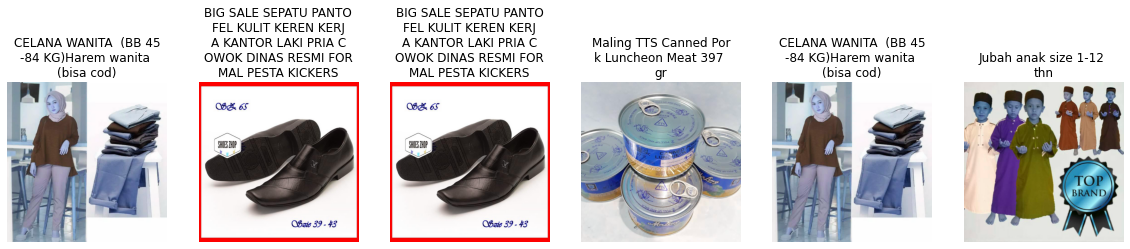

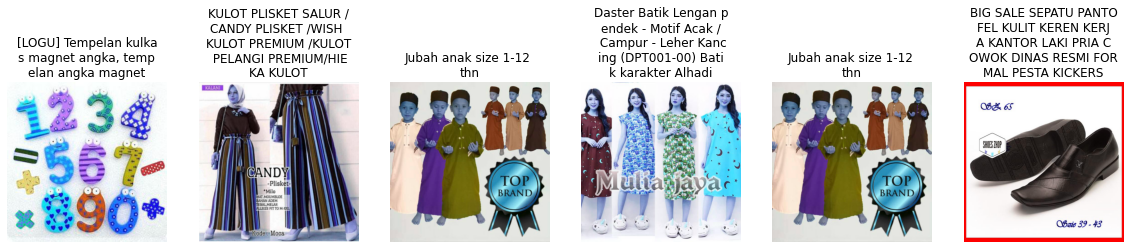

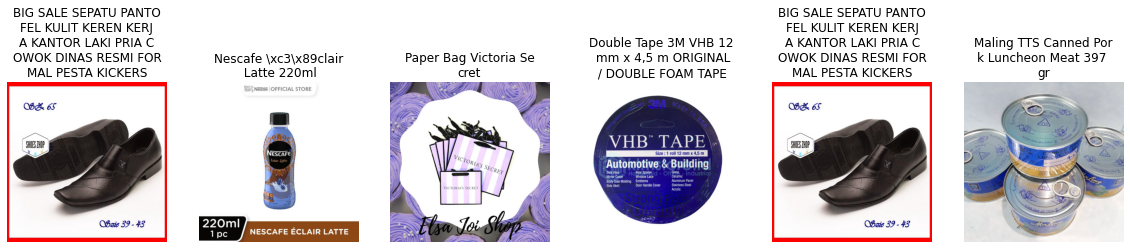

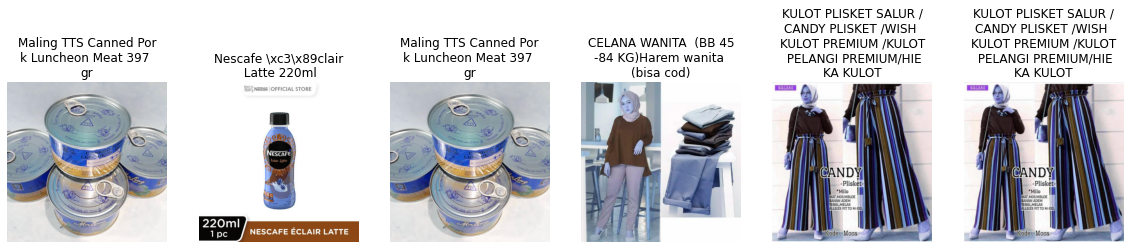

In [2]:
import matplotlib.pyplot as plt
import cv2
BASE = "/Users/local/lab/work/kaggle/Shopee---Price-Match-Guarantee/src/preparation/train_images/"

def displayDF(train, random=False, COLS=6, ROWS=4, path=BASE):
    for k in range(ROWS):
        plt.figure(figsize=(20,5))
        for j in range(COLS):
            if random: row = np.random.randint(0,len(train))
            else: row = COLS*k + j
            name = train.iloc[row,1]
            title = train.iloc[row,3]
            title_with_return = ""
            for i,ch in enumerate(title): 
                title_with_return += ch
                if (i!=0)&(i%20==0): 
                    title_with_return += '\n' 
            img = cv2.imread(path+name)
            plt.subplot(1,COLS,j+1)
            plt.title(title_with_return)
            plt.axis('off')
            plt.imshow(img)
        plt.show()
        
displayDF(train,random=True)

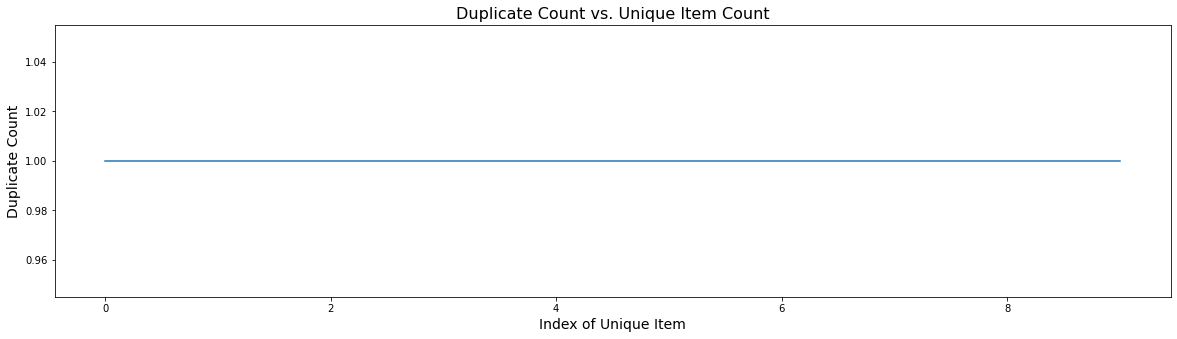

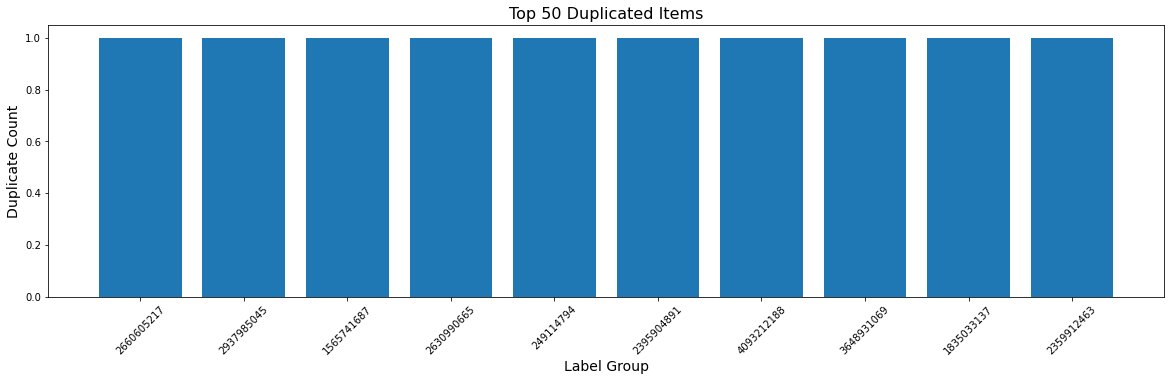

In [3]:
groups = train.label_group.value_counts()
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(groups)),groups.values)
plt.ylabel('Duplicate Count',size=14)
plt.xlabel('Index of Unique Item',size=14)
plt.title('Duplicate Count vs. Unique Item Count',size=16)
plt.show()

plt.figure(figsize=(20,5))
plt.bar(groups.index.values[:50].astype('str'),groups.values[:50])
plt.xticks(rotation = 45)
plt.ylabel('Duplicate Count',size=14)
plt.xlabel('Label Group',size=14)
plt.title('Top 50 Duplicated Items',size=16)
plt.show()

########################################
### TOP 1 DUPLICATED ITEM: 2660605217
########################################


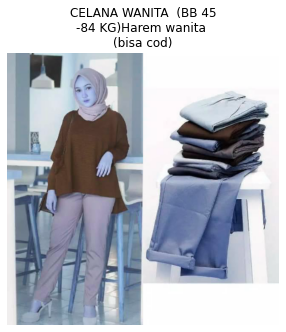

########################################
### TOP 2 DUPLICATED ITEM: 2937985045
########################################


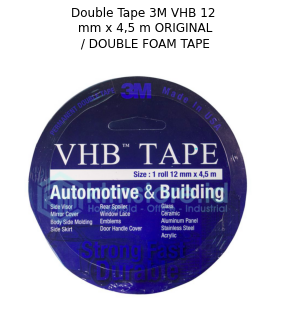

########################################
### TOP 3 DUPLICATED ITEM: 1565741687
########################################


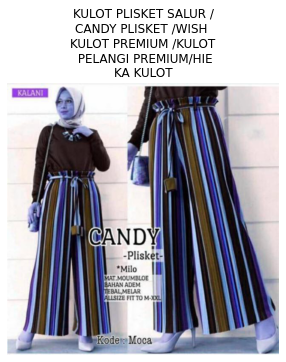

########################################
### TOP 4 DUPLICATED ITEM: 2630990665
########################################


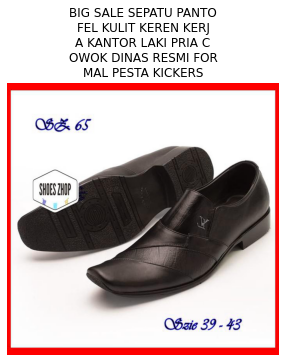

########################################
### TOP 5 DUPLICATED ITEM: 249114794
########################################


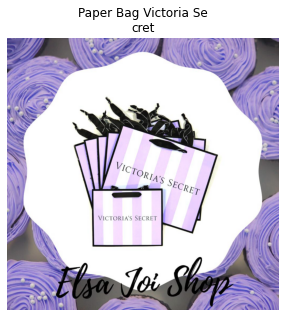

In [4]:
for k in range(5):
    print('#'*40)
    print('### TOP %i DUPLICATED ITEM:'%(k+1),groups.index[k])
    print('#'*40)
    top = train.loc[train.label_group==groups.index[k]]
    displayDF(top, random=False, ROWS=1, COLS=1)

In [5]:
# TF-IDF(索引語頻度逆文書頻度)文書中に含まれる単語の重要度を評価するNearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
# K近傍法
from sklearn.neighbors import NearestNeighbors

In [6]:
train_gf = pd.read_csv("/Users/local/lab/work/kaggle/Shopee---Price-Match-Guarantee/src/preparation/train.csv")[:10]
print('train shape is', train_gf.shape )
train_gf.head()

train shape is (10, 5)


,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [7]:
model = TfidfVectorizer(stop_words='english', binary=True)
                                # ------------------------------  ----------------
                                # 英語の文字列をリストに返す。     Trueの場合1の値で返す。
text_embeddings = model.fit_transform(train_gf.title).toarray()
                                                                             # -----------
                                                                             # 行列を密にする。
print('text embeddings shape is',text_embeddings.shape)

text embeddings shape is (10, 80)


In [8]:
KNN = 3
model = NearestNeighbors(n_neighbors=KNN)
model.fit(text_embeddings)
distances, indices = model.kneighbors(text_embeddings)
                                      # --------------
                                      # 各ポイントの近傍のインデックスと距離を返します。

In [9]:
distances, indices 

(array([[0.        , 1.41421356, 1.41421356],
        [0.        , 1.32690498, 1.41421356],
        [0.        , 1.41421356, 1.41421356],
        [0.        , 1.41421356, 1.41421356],
        [0.        , 1.41421356, 1.41421356],
        [0.        , 1.41421356, 1.41421356],
        [0.        , 1.32690498, 1.41421356],
        [0.        , 1.41421356, 1.41421356],
        [0.        , 1.41421356, 1.41421356],
        [0.        , 1.41421356, 1.41421356]]),
 array([[0, 3, 2],
        [1, 6, 3],
        [2, 3, 4],
        [3, 2, 4],
        [4, 3, 2],
        [5, 1, 2],
        [6, 1, 3],
        [7, 3, 2],
        [8, 3, 2],
        [9, 1, 2]]))

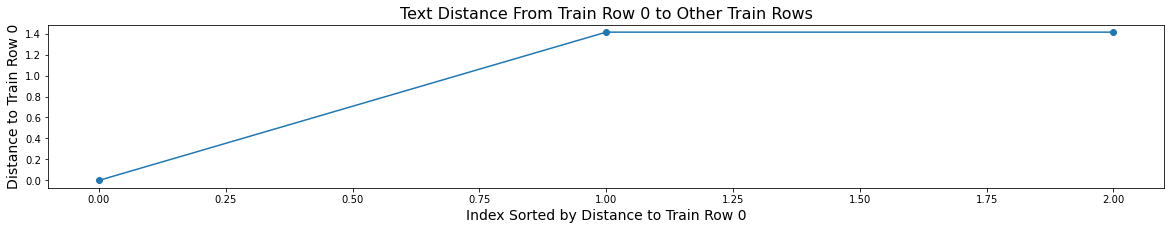

                                               title  label_group
0                          Paper Bag Victoria Secret    249114794
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891


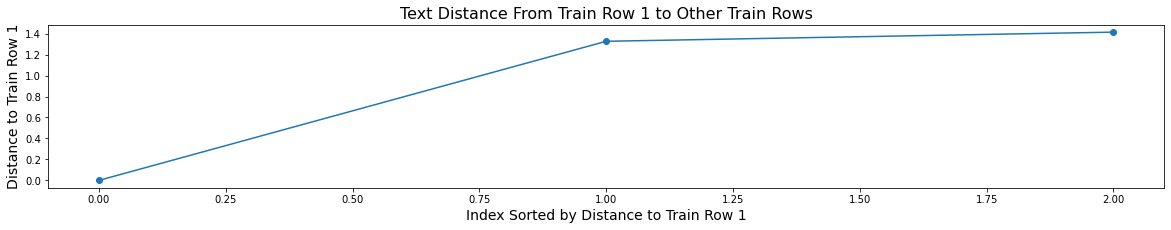

                                               title  label_group
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045
6                           Jubah anak size 1-12 thn   1835033137
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188


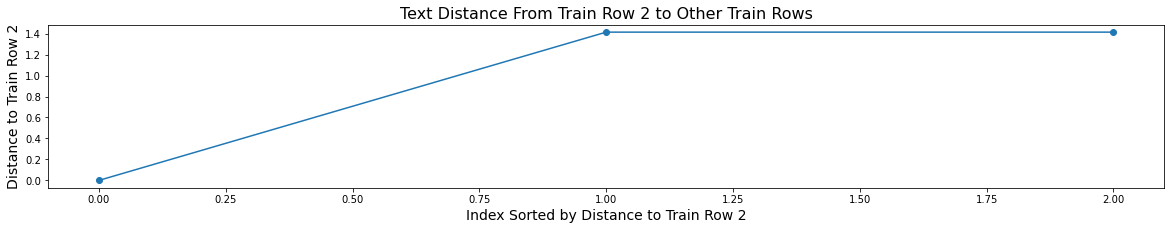

                                               title  label_group
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069


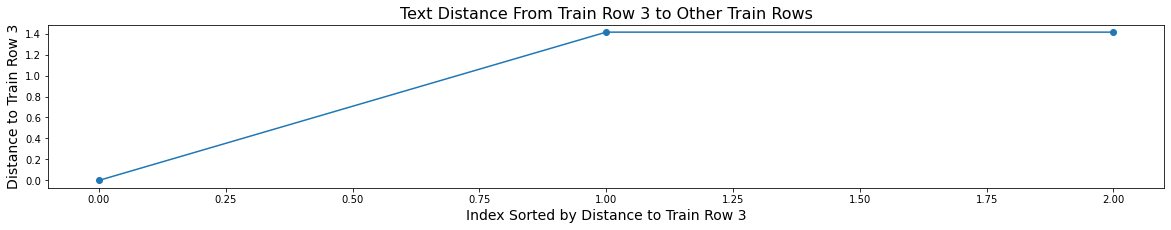

                                               title  label_group
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069


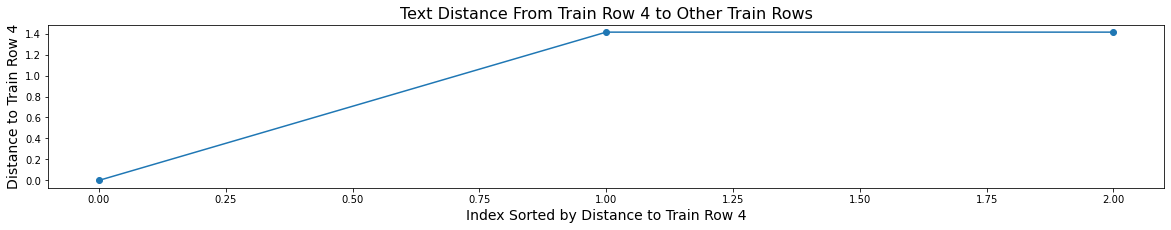

                                               title  label_group
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891


In [10]:
for k in range(5):
    plt.figure(figsize=(20,3))
    plt.plot(np.arange(3), distances[k,], 'o-')
    plt.title('Text Distance From Train Row %i to Other Train Rows'%k,size=16)
    plt.ylabel('Distance to Train Row %i'%k,size=14)
    plt.xlabel('Index Sorted by Distance to Train Row %i'%k,size=14)
    plt.show()
    
    print( train_gf.loc[indices[k,:10], ['title','label_group']] )

In [11]:
conda list

# packages in environment at /Users/local/miniforge3/envs/python38:
#
# Name                    Version                   Build  Channel
abseil-cpp                20210324.0           hbdafb3b_0    conda-forge
absl-py                   0.12.0             pyhd8ed1ab_0    conda-forge
aiohttp                   3.7.4            py38h30f7421_0    conda-forge
anyio                     2.2.0            py38h10201cd_0    conda-forge
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
appnope                   0.1.2            py38h10201cd_1    conda-forge
argon2-cffi               20.1.0           py38h30f7421_2    conda-forge
astor                     0.8.1              pyh9f0ad1d_0    conda-forge
astunparse                1.6.3              pyhd8ed1ab_0    conda-forge
async-timeout             3.0.1                   py_1000    conda-forge
async_generator           1.10                       py_0    conda-forge
attrs                     20.3.0             pyhd3deb0d_0   

In [12]:
import tensorflow as tf

In [13]:
class DataGenerator(tf.keras.utils.Sequence):
    'Kerasのデータを生成します'
    def __init__(self, df, img_size=256, batch_size=32, path=BASE): 
        self.df = df                                         # >> train
        self.img_size = img_size                      # >> 256
        self.batch_size = batch_size                # >> 128
        self.path = path                                 # >> train_images
        self.indexes = np.arange( len(self.df) )# >> [0 1 2 3 4 5 6 7 8 9]
        
    def __len__(self):
        'エポックあたりのバッチ数を示します'
        ct = len(self.df) // self.batch_size # >> 10 // 128 = 0
        ct += int(( (len(self.df)) % self.batch_size)!=0) # >> 10 % 128 = 10 != 0 = True
        return ct

    def __getitem__(self, index):
        'データの1つのバッチを生成します'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        X = self.__data_generation(indexes)
        return X
    
    def __data_generation(self, indexes):
        'batch_sizeサンプルを含むデータを生成します' 
        X = np.zeros((len(indexes),self.img_size,self.img_size,3),dtype='float32')
        df = self.df.iloc[indexes]
        for i,(index,row) in enumerate(df.iterrows()):
            img = cv2.imread(self.path+row.image)
            X[i,] = cv2.resize(img,(self.img_size,self.img_size)) #/128.0 - 1.0
        return X

In [ ]:
import numpy as np
from skimage.io import imread
from efficientnet.keras import EfficientNetB0
from efficientnet.keras import center_crop_and_resize, preprocess_input

# テスト画像
image = imread('./panda.jpg')


# 学習済みモデルのロード
model = EfficientNetB0(weights='imagenet')
# 画像の前処理
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# 分類
y = model.predict(x)
print(decode_predictions(y))

In [ ]:
from efficientnet.keras import EfficientNetB0
# # 学習済みモデルB0~B7まである内の1番小さいモデル
# # (B7はB0の約精度+5%, 学習時間31倍 ※データにより異なる)

model = EfficientNetB0(weights='imagenet',include_top=False, pooling='avg', input_shape=None)
train_gen = DataGenerator(train, batch_size=128)
image_embeddings = model.predict(train_gen,verbose=1)
print('image embeddings shape is',image_embeddings.shape)

In [ ]:
KNN = 50
model = NearestNeighbors(n_neighbors=KNN)
model.fit(image_embeddings)
distances, indices = model.kneighbors(image_embeddings)

In [ ]:
for k in range(180,190):
    plt.figure(figsize=(20,3))
    plt.plot(np.arange(50), distances[k,] ,'o-')
    plt.title('Image Distance From Train Row %i to Other Train Rows'%k,size=16)
    plt.ylabel('Distance to Train Row %i'%k,size=14)
    plt.xlabel('Index Sorted by Distance to Train Row %i'%k,size=14)
    plt.show()
    
    cluster = train.loc[indices[k,:8]] 
    displayDF(cluster, random=False, ROWS=2, COLS=4)